# Repositório Numerical-Methods: Método de Runge-Kutta 4ª Ordem (RK4) para EDOs
# Autora: Prof. Ana Isabel Castillo (@IsabelCasPe)
# Licença: CC BY-NC-ND 4.0 (uso educacional, não comercial)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

In [2]:
def rk4(f, y0, t, args=()):
    """Método de Runge-Kutta de 4ª ordem para resolver EDOs dy/dt = f(t, y)
    Args:
        f: Função que define a EDO (dy/dt = f(t, y))
        y0: Condições iniciais (array)
        t: Vetor de tempos
        args: Parâmetros adicionais para f
    Returns:
        array: Solução y(t)
    """
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0
    h = t[1] - t[0]

    for i in range(n - 1):
        k1 = f(t[i], y[i], *args)
        k2 = f(t[i] + h/2, y[i] + h*k1/2, *args)
        k3 = f(t[i] + h/2, y[i] + h*k2/2, *args)
        k4 = f(t[i] + h, y[i] + h*k3, *args)
        y[i + 1] = y[i] + (h/6) * (k1 + 2*k2 + 2*k3 + k4)

    return y

In [3]:
def lotka_volterra(t, y, alpha, beta, delta, gamma):
    """Modelo predador-presa (Lotka-Volterra):
       dx/dt = alpha*x - beta*x*y (presas)
       dy/dt = delta*x*y - gamma*y (predadores)
    Args:
        t: Tempo
        y: Vetor [x, y] (populações de presas e predadores)
        alpha, beta, delta, gamma: Parâmetros do modelo
    Returns:
        array: Derivadas [dx/dt, dy/dt]
    """
    x, y = y
    dx_dt = alpha * x - beta * x * y
    dy_dt = delta * x * y - gamma * y
    return np.array([dx_dt, dy_dt])

In [4]:
# Exemplo fixo: coelhos (presas) e raposas (predadores)
print("Numerical-Methods: RK4 para Modelo Predador-Presa")
print("Exemplo: Coelhos e raposas com parâmetros padrão")
alpha = 1.0  # Taxa de crescimento das presas
beta = 0.1   # Taxa de predação
delta = 0.075  # Taxa de crescimento dos predadores
gamma = 1.5  # Taxa de mortalidade dos predadores
y0 = [30, 4]  # Populações iniciais: 30 coelhos, 4 raposas
t = np.linspace(0, 20, 1000)  # Tempo de 0 a 20 unidades

Numerical-Methods: RK4 para Modelo Predador-Presa
Exemplo: Coelhos e raposas com parâmetros padrão


In [5]:
# Resolver EDO com RK4
sol = rk4(lotka_volterra, y0, t, args=(alpha, beta, delta, gamma))
presas, predadores = sol[:, 0], sol[:, 1]

<ipython-input-6-9f791f0e4adb>:3: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(t, presas, 'b-', label="Coelhos (Presas)", color="#1f77b4")  # financeblue
<ipython-input-6-9f791f0e4adb>:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(t, predadores, 'r-', label="Raposas (Predadores)", color="#ff7f0e")


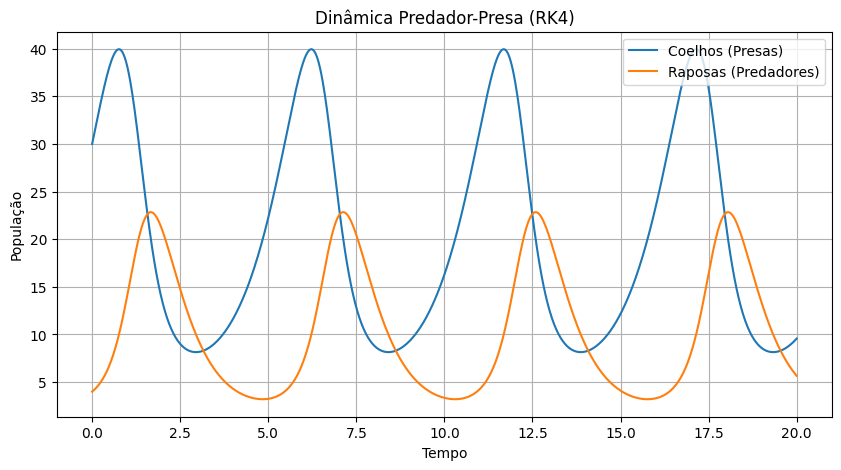

In [6]:
# Gráfico 1: Populações vs. Tempo
plt.figure(figsize=(10, 5))
plt.plot(t, presas, 'b-', label="Coelhos (Presas)", color="#1f77b4")  # financeblue
plt.plot(t, predadores, 'r-', label="Raposas (Predadores)", color="#ff7f0e")
plt.xlabel("Tempo")
plt.ylabel("População")
plt.title("Dinâmica Predador-Presa (RK4)")
plt.grid(True)
plt.legend()
plt.show()

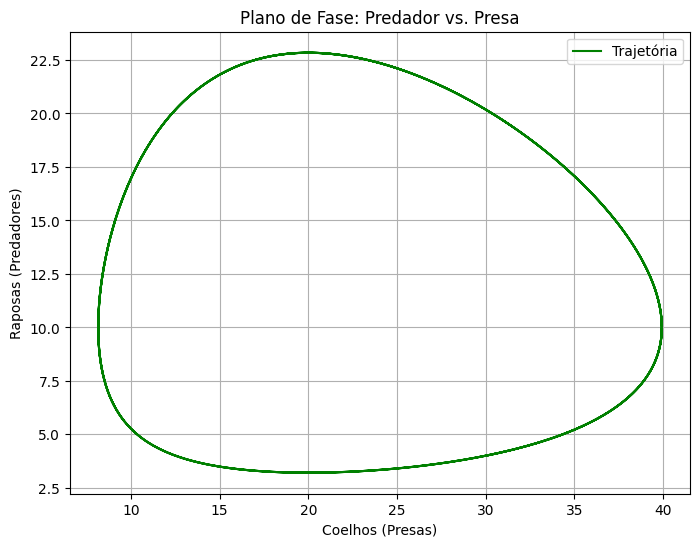

In [7]:
# Gráfico 2: Plano de Fase
plt.figure(figsize=(8, 6))
plt.plot(presas, predadores, 'g-', label="Trajetória")
plt.xlabel("Coelhos (Presas)")
plt.ylabel("Raposas (Predadores)")
plt.title("Plano de Fase: Predador vs. Presa")
plt.grid(True)
plt.legend()
plt.show()

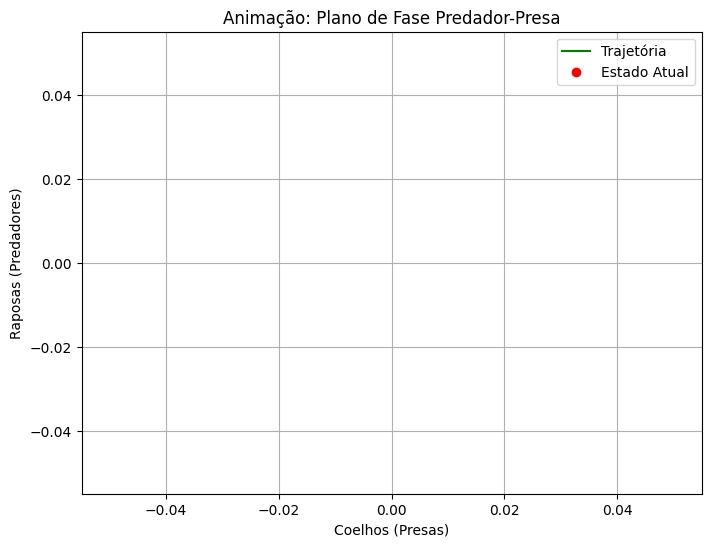

In [8]:
# Animação do Plano de Fase (surpresa!)
fig, ax = plt.subplots(figsize=(8, 6))
ax.set_xlabel("Coelhos (Presas)")
ax.set_ylabel("Raposas (Predadores)")
ax.set_title("Animação: Plano de Fase Predador-Presa")
ax.grid(True)
line, = ax.plot([], [], 'g-', label="Trajetória")
point, = ax.plot([], [], 'ro', label="Estado Atual")
ax.legend()

In [9]:
def init():
    ax.set_xlim(0, max(presas) * 1.1)
    ax.set_ylim(0, max(predadores) * 1.1)
    line.set_data([], [])
    point.set_data([], [])
    return line, point

In [10]:
def animate(i):
    line.set_data(presas[:i], predadores[:i])
    point.set_data(presas[i], predadores[i])
    return line, point

In [11]:
ani = FuncAnimation(fig, animate, init_func=init, frames=len(t), interval=50, blit=True)
plt.show()


Agora é com você! Teste seus próprios parâmetros:
Taxa de crescimento das presas (ex.: 1.0): 1.0
Taxa de predação (ex.: 0.1): 0.1
Taxa de crescimento dos predadores (ex.: 0.075): 0.75
Taxa de mortalidade dos predadores (ex.: 1.5): 1.5
Coelhos iniciais (ex.: 30): 30
Raposas iniciais (ex.: 4): 4


<ipython-input-14-ef37167d4095>:15: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b-" (-> color='b'). The keyword argument will take precedence.
  plt.plot(t, presas, 'b-', label="Coelhos (Presas)", color="#1f77b4")
<ipython-input-14-ef37167d4095>:16: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r-" (-> color='r'). The keyword argument will take precedence.
  plt.plot(t, predadores, 'r-', label="Raposas (Predadores)", color="#ff7f0e")


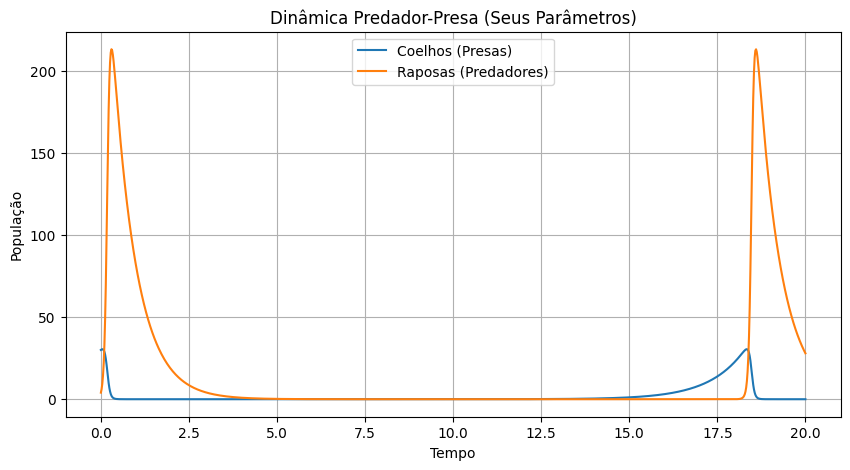

In [14]:
# Parte interativa: aluno testa seus próprios parâmetros
print("\nAgora é com você! Teste seus próprios parâmetros:")
try:
    alpha = float(input("Taxa de crescimento das presas (ex.: 1.0): "))
    beta = float(input("Taxa de predação (ex.: 0.1): "))
    delta = float(input("Taxa de crescimento dos predadores (ex.: 0.075): "))
    gamma = float(input("Taxa de mortalidade dos predadores (ex.: 1.5): "))
    y0 = [float(input("Coelhos iniciais (ex.: 30): ")),
          float(input("Raposas iniciais (ex.: 4): "))]
    sol = rk4(lotka_volterra, y0, t, args=(alpha, beta, delta, gamma))
    presas, predadores = sol[:, 0], sol[:, 1]

 # Gráfico interativo: Populações vs. Tempo
    plt.figure(figsize=(10, 5))
    plt.plot(t, presas, 'b-', label="Coelhos (Presas)", color="#1f77b4")
    plt.plot(t, predadores, 'r-', label="Raposas (Predadores)", color="#ff7f0e")
    plt.xlabel("Tempo")
    plt.ylabel("População")
    plt.title("Dinâmica Predador-Presa (Seus Parâmetros)")
    plt.grid(True)
    plt.legend()
    plt.show()
except ValueError:
    print("Ops! Digite apenas números válidos (ex.: 1.0, 0.1, 0.075, 1.5, 30, 4).")
